<h1><center> Projeto Final de Física Aplicada à Computação </h1></center>
<h2><center> Engenharia Informática - Escola Superior de Tecnologia e Gestão - IPBeja </h2></center>
<h3><center> Denis Gabriel Cicau - 25442 | 28-01-2024 | <a href="https://github.com/kt5u/FAC-Final/">GitHub</a> </h3></center>

# Introdução
## T1 – Arduino: aquisição, tratamento e visualização de dados de sensor

## 1.1 - Realização do sketch que fornece os dados

### *seri_arduinoV1.ino*
 
 
 
O seguinte código desenvolvido para o Arduino Nano RP2040 Connect realiza a aquisição de dados provenientes do sensor de temperatura. A implementação do código incorpora a comunicação serial para a transmissão dos dados ao computador, acompanhada de um marcador de tempo que registra os segundos decorridos desde o início do programa até cada instante de leitura do sensor.

In [1]:
# É favor não correr o código desta célula, apenas serve para mera exposição 
/* 
*  Autor ----------------------- @Denis Cicau - 25442
*
*  Repositório: ---------------- https://github.com/kt5u/FAC-Final
*
*  Instituição: ---------------- Instituto Politécnico de Beja - Escola Superior de Tecnologia e Gestão
*
*  Curso / Unidade Curricular: - Engenharia Informática - Física Aplicada à Computação
*
*  Data / Ano Letivo: ---------- 2023/2024 | 28-01-2024
*
*  Descrição do projeto: ------- Aquisição de dados de temperatura e tempo utilizando um Arduino
*
*  Hardware: ------------------- Arduino Nano rp2040 Connect
*
*  Bibliotecas utilizadas:  ---- LSM6DSOX (sensor de temperatura)
*/

#include <Arduino.h>
#include <Arduino_LSM6DSOX.h>
#define seconds() (millis()/1000)

void setup() 
{
  Serial.begin(9600);
  while(!Serial);
  Serial.println("Aquisição de dados: Temperatura e Tempo");
  
  if(!IMU.begin()){ // Inicialização da interface de sensores
        Serial.println("Não consegue inicializar IMU!");
        while (1);
    }
}

void loop() 
{
    if (IMU.temperatureAvailable()) // Aquisição de dados
    {
        int time = 0;
        float temp = 0;
        IMU.readTemperatureFloat(temp);
        time = seconds() - time;
        Serial.print(time);
        Serial.print(", "); // separação dos dados por uma vírgula e um espaço
        Serial.println(temp);
        delay(1000); // Aquisição a cada segundo
    }
}

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (2706857277.py, line 11)

<hr style='border: 2px solid black'>

### Bibliotecas utilizadas

Foram empregadas diversas bibliotecas recomendadas pelo professor para otimizar o desenvolvimento e garantir uma integração eficiente com o hardware. Estas bibliotecas desempenham papéis específicos no código, contribuindo para a funcionalidade global do sistema. A seguir, são listadas as principais bibliotecas utilizadas:

In [2]:
# É favor correr esta célula para que o resto do trabalho seja executado corretamente!
import sys
import serial
import serial.tools.list_ports as sp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

---

## 1.2- Verificação da disponibilidade da porta de comunicação e aquisição de dados do Arduino

### Portas disponíveis


O trecho de código apresentado tem como objetivo verificar a disponibilidade das portas de comunicação no sistema e obter informações sobre essas portas. A biblioteca serial.tools.list_ports foi empregada para criar uma lista das portas disponíveis para comunicação. <br>

Utiliza a função ***serial.tools.list_ports.comports()*** para obter uma lista de objetos, representando as portas de comunicação disponíveis no sistema. Essa lista é armazenada na variável ***available_ports***, realiza um loop sobre a lista de portas ***(available_ports)*** para extrair informações específicas de cada porta e Imprime informações detalhadas sobre cada porta, incluindo: <br>

> - **Porta:** O identificador da porta (***port.device***). <br>
> - **Descrição:** Uma descrição detalhada da porta (***port.description***). <br>
> - **HWID:** O identificador de hardware da porta (***port.hwid***) <br>
> - **Fabricante:** O nome do fabricante da porta (***port.manufacturer***). <br>

In [3]:
# Cria uma "lista" com as portas que estão disponíveis para comunicação
available_ports = sp.comports()

# Informações sobre todas as portas disponíveis
for port in available_ports:
    print(f'Port:\t{port.device}\nDesc.:\t{port.description}\nHWID:\t{port.hwid}\nFab.:\t{port.manufacturer}')

Port:	COM3
Desc.:	Dispositivo de Série USB (COM3)
HWID:	USB VID:PID=2341:005E SER=3350315009003637 LOCATION=1-1:x.0
Fab.:	Microsoft


## Informações da conexão estabelecida anteriormente


O trecho de código apresenta a configuração da conexão serial estabelecida anteriormente. Um objeto da classe ***serial.Serial()*** foi instanciado para gerenciar a comunicação serial, e os parâmetros essenciais foram definidos para estabelecer a conexão com o Arduino Nano RP2040 Connect. Os principais elementos configurados incluem:

> - **Taxa de Transmissão (***Baudrate***):** Configurado para 9600 bps.
> - **Porta de Comunicação:** Atribuída com base na porta disponível previamente identificada.
> - **Timeout:** Estabelecido em 2000 milissegundos para permitir intervalos de tempo apropriados durante a comunicação.

In [4]:
ser = serial.Serial()
ser.baudrate = 9600 
ser.port = port.device
ser.timeout = 2000

# print das informações da conexão
print('Informação sobre a conexão:\n')
print('Connexão à porta ' + ser.portstr)
print('Config. da porta:\n\t\tBaudrate: {0}\n\t\tParity Bits: {1}\n\t\tByte size: {2}\n\t\tStop bits: {3}:\n\t\tTimeout: {4}'.
      format(ser.baudrate, ser.parity, ser.bytesize, ser.stopbits, ser.timeout))

Informação sobre a conexão:

Connexão à porta COM3
Config. da porta:
		Baudrate: 9600
		Parity Bits: N
		Byte size: 8
		Stop bits: 1:
		Timeout: 2000


## 1.3 - Leitura e armazenamento dos dados do Arduino

A secção de código asseguir apresenta a implementação da leitura dos dados provenientes do sensor do Arduino utilizando a biblioteca ***Serial***, guardando-os em listas, nomeadamente: <br>
> - **dados_Tempo**: Lista onde são guardados os dados referentes ao tempo
> - **dados_Temperatura**: Lista onde são guardados os dados referentes à temperatura


O utilizador é solicitado a inserir o número desejado de séries de aquisição (**N**), e o processo de recolha de dados é iniciado. Durante esse processo, um loop é executado para ler o número de amostras especificado.  Cada amostra é lida, decodificada e desprovida de espaços em branco e vírgulas, utilizando as seguintes linhas de código:
> *linha = ser.readline().decode().strip()* <br>
> *dados = linha.split(', ')* <br> 


Os dados são então divididos e verificados quanto à formatação correta (dois elementos separados por uma vírgula e um espaço). Se a formatação estiver correta, os dados de tempo são convertidos para inteiro e os dados de temperatura para float, sendo adicionados às listas correspondentes. Caso ocorra algum problema de formatação, é exibida uma mensagem de erro. Após a conclusão da recolha de dados, a porta serial é fechada e uma mensagem informa sobre o término do processo.

In [7]:
# inicialização das listas usadas para armazenar dados de tempo e temperatura
dados_Tempo = []
dados_Temperatura = []

if not ser.is_open: # abertura da porta serial para comunicação caso não esteja aberta
    print('A conexão vai ser aberta.\n')
    ser.open()

# solicita o número de séries de aquisição ao utilizador
N = int(input('Número de séries de aquisição: '))
NumeroAmostras = range(1, N+1)

print('')
print('A começar o processo de recolha de dados...\n')
print('')
print('ATENÇÃO: Este processo leva algum tempo, por favor aguarde...\n')
print('...')
    
try:
    # leitura do número de amostras pedidas pelo usuário
    for _ in NumeroAmostras:
        linha = ser.readline().decode().strip()
        dados = linha.split(', ') # "limpeza" das strings 
        if len(dados) == 2:
            dados_Tempo.append(int(dados[0]))
            dados_Temperatura.append(float(dados[1]))
        else:
            print('Lista de dados / formatação errada!\n') # Mensagem de erro
        
finally:
    ser.close()
    print('Recolha de dados concluída!\n')
    print('A fechar a porta')

A conexão vai ser aberta.

Número de séries de aquisição: 200

A começar o processo de recolha de dados...


ATENÇÃO: Este processo leva algum tempo, por favor aguarde...

...
Recolha de dados concluída!

A fechar a porta


Já feita a leitura dos dados fornecidos pelo Arduino, prossegue-se ao armazenamento dos mesmos, através da biblioteca ***pandas***. <br>

> - É dado o nome ao ficheiro e o "path" onde ele vai ser guardado <br>
> - De seguida é criado o dataframe, onde são guardados os valores adquiridos <br>
> - Criado o dataframe, é exportado para um ficheiro .csv, com o nome e "path" atribuído anteriormente <br>

In [8]:
# Criação do ficheiro e do local de armazenamento
filename = 'dados_sensor_raw' 
filepath = 'Ficheiros/T1/' + filename

# Criação dos dataframes com os dados obtidos
df = pd.DataFrame({'Tempo': dados_Tempo, 'Temperatura': dados_Temperatura})
df.to_csv(filepath + '.csv', index=False)

print(f'Os dados foram guardados com o nome de "{filename}".csv em: {filepath}.\n')

Os dados foram guardados com o nome de "dados_sensor_raw".csv em: Ficheiros/T1/dados_sensor_raw.



---

## 1.4 - Visualização Gráfica dos Dados Adquiridos
Com base nos dados obtidos no ponto 3 e utilizando a biblioteca ***Matplotlib***, o código subsequente realiza a geração de gráficos, empregando métodos e procedimentos consistentes com os princípios científicos da visualização de dados. <br>

> - **Formatação do título e dos eixos** <br>
>
> Para manter uma estrutura clara e concisa no trabalho, foi criado um dicionário com a formatação do título e dos eixos para que todas as representações gráficas tenham a mesma estrutura

In [9]:
# Dicionário do título 
formatoTitulo = {'family': 'sans',
         'color':  'darkblue',
         'weight': 'bold',
         'size': 14,
        }

# Dicionário dos eixos
formatoEixos = {'family': 'sans',
         'color':  'black',
         'weight': 'normal',
         'size': 12,
        }

> - **Armazenamento das representações gráficas**
>
> O nome do diretório e o caminho para armazenamento do gráfico foram definidos para manter uma estrutura organizada.

In [10]:
# Nome do ficheiro e path
imagensT1_directory = 'Ficheiros/T1/'
graficoT1_nome = 'Gráfico_TemperaturaTempo.png'
imagensT1_filepath = imagensT1_directory + graficoT1_nome

> - **Criação da plot e da curva do gráfico**
>
> Prossegue-se então com a leitura do dataframe onde estão armazenados os dados, e é criada a representação gráfica da Temperatura ao longo do Tempo

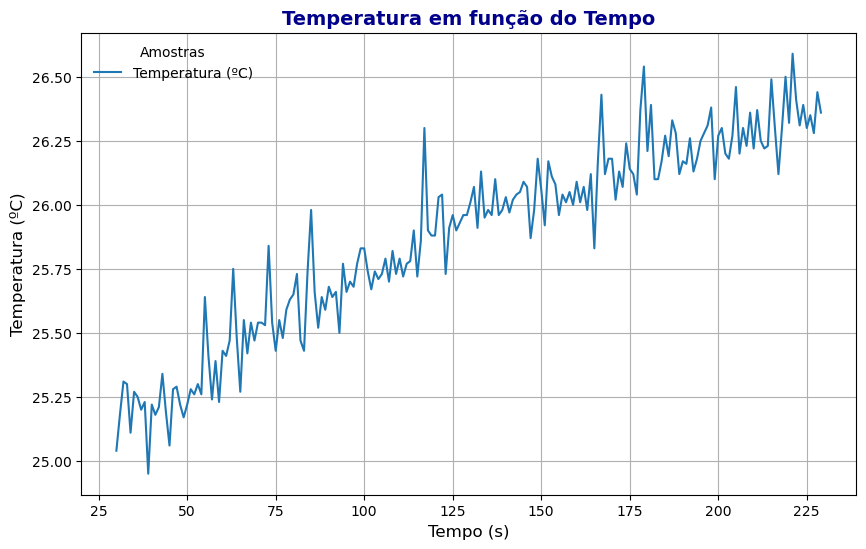

In [11]:
# Leitura dos dados armazenados no dataframe
df = pd.read_csv(filepath + '.csv')

# Tamanho do gráfico
plt.figure(figsize=(10, 6))

# Desenho do gráfico de temperatura
plt.plot(df['Tempo'], df['Temperatura'], label='Temperatura (ºC)')

# Eixos do gráfico
plt.xlabel('Tempo (s)', fontdict=formatoEixos)
plt.ylabel('Temperatura (ºC)', fontdict=formatoEixos)
plt.title('Temperatura em função do Tempo', fontdict=formatoTitulo)
plt.legend(title='Amostras', frameon=False)

plt.savefig(imagensT1_filepath, dpi = 1000)
plt.grid() # quadriculado para uma melhor leitura do gráfico
plt.show()

---

## 1.5 - Cálculo de grandezas básicas: média, mediana, max, min, desvio padrão

A presente análise teve como objetivo calcular e apresentar medidas estatísticas descritivas fundamentais para a compreensão da variabilidade da temperatura em um conjunto de dados. Foram determinadas a média, mediana, desvio padrão, máximo e mínimo da variável temperatura, utilizando as seguintes funções da biblioteca *Matplotlib*:

> - ***.mean()*** = média
> - ***.max()*** = máxima
> - ***.min()*** = mínima
> - ***.median()*** = mediana
> - ***.std()*** = desvio padrão (standard deviation)


In [12]:
print('Grandezas de estatística: \n')

TemperaturaMedia = df['Temperatura'].mean() # média da temperatura
TemperaturaMaxima = df['Temperatura'].max() # temperatura maxima
TemperaturaMinima = df['Temperatura'].min() # temperatura minima
TemperaturaMediana = df['Temperatura'].median() # mediana das temperaturas
TemperaturaDesvioPadrao = df['Temperatura'].std() # desvio padrão das temperaturas 

print(f'Média: {TemperaturaMedia:.2f} ºC')
print(f'Temperatura Máxima: {TemperaturaMaxima:.2f} ºC')
print(f'Temperatura Mínima: {TemperaturaMinima:.2f} ºC')
print(f'Mediana das Temperaturas: {TemperaturaMediana:.2f}')
print(f'Desvio padrão das Temperaturas: {TemperaturaDesvioPadrao:.3f}')

Grandezas de estatística: 

Média: 25.87 ºC
Temperatura Máxima: 26.59 ºC
Temperatura Mínima: 24.95 ºC
Mediana das Temperaturas: 25.96
Desvio padrão das Temperaturas: 0.378


---

## 1.6 - Criação de um Gráfico de Frequência

Este procedimento envolve a criação de um histograma para visualizar a distribuição das frequências absolutas dos valores adquiridos da variável temperatura. O gráfico resultante proporciona uma representação visual da distribuição da temperatura no conjunto de dados. <br>

Foi mantida a mesma metodologia que o gráfico anterior:
> - Criação do diretório e nome do ficheiro
> - Realização da visualização gráfica
> - Armazenamento no diretório definido

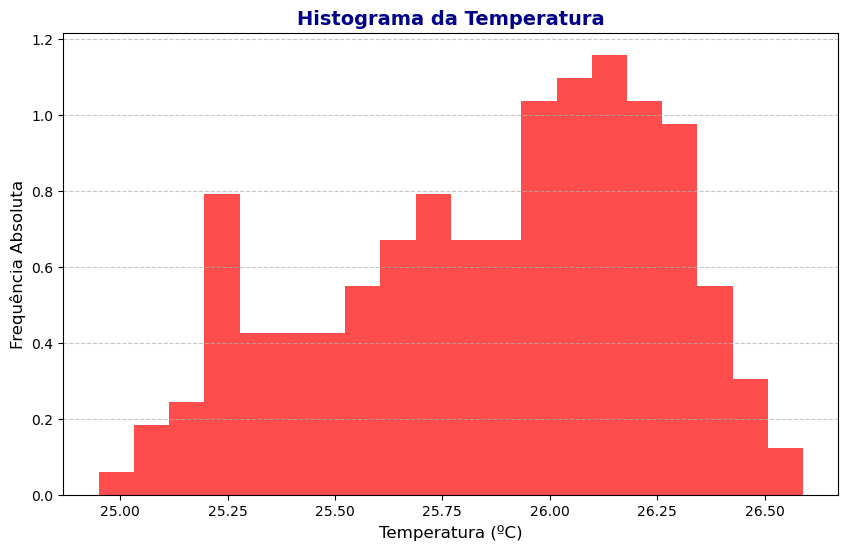

In [13]:
# Nome do ficheiro e path
histogramaTemp_nome = 'Histograma_TemperaturaTempo.png'
imagens_filepath = imagensT1_directory + histogramaTemp_nome


plt.figure(figsize=(10, 6))
plt.title('Histograma da Temperatura', fontdict=formatoTitulo)
plt.xlabel('Temperatura (ºC)', fontdict=formatoEixos)
plt.ylabel('Frequência Absoluta', fontdict=formatoEixos)
plt.hist(df['Temperatura'], bins=20, density=True, facecolor='red', histtype="stepfilled", alpha=0.7)

plt.savefig(imagens_filepath, dpi = 1000)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

---

## 1.7 - Caracterização dos dados adquiridos 

Este código lê o *dataframe* criado anteriormente com as listas de dados fornecidas, adiciona os resultados dos cálculos de grandezas descritivas previamente calculadas e gera um arquivo "report.txt" com essas informações.

In [14]:
filenameRelatorio = 'report'
filepathRelatorio = 'Ficheiros/T1/' + filenameRelatorio

df = pd.read_csv(filepath + '.csv') # leitura do dataframe com os dados

# cálculos estatísticos
TemperaturaMedia = df['Temperatura'].mean() # média da temperatura
TemperaturaMaxima = df['Temperatura'].max() # temperatura maxima
TemperaturaMinima = df['Temperatura'].min() # temperatura minima
TemperaturaMediana = df['Temperatura'].median() # mediana das temperaturas
TemperaturaDesvioPadrao = df['Temperatura'].std() # desvio padrão das temperaturas 

# informações adicionais/autorais
Arduino_modelo = 'Arduino Nano rp2040 Connect'
Autor = 'Denis Gabriel Cicau - 25442'
Data_Realizacao = '27-01-2024'

# conteúdo que vai estar presente em "report.txt"
relatorio_conteudo = f"""--------REPORT.TXT--------

Autor do Código: {Autor}
Hardware: {Arduino_modelo}
Data de realização: {Data_Realizacao}

Cálculos Descritivos: 

[+] Média: {TemperaturaMedia:.2f} ºC
[+] Temperatura Máxima: {TemperaturaMaxima:.2f} ºC
[+] Temperatura Mínima: {TemperaturaMinima:.2f} ºC
[+] Mediana das Temperaturas: {TemperaturaMediana:.2f}
[+] Desvio padrão das Temperaturas: {TemperaturaDesvioPadrao:.2f}

------------------------------------------------------------------------------

Análise dos dados obtidos:

[+] A média da temperatura, {TemperaturaMedia:.2f} ºC, representa o valor médio observado ao longo do experimento.
    A consistência desse valor sugere que o sistema manteve uma temperatura estável durante o período de aquisição.
    
[+] As temperaturas máxima e mínima, {TemperaturaMaxima:.2f} ºC e {TemperaturaMinima:.2f} ºC, respectivamente, indicam a amplitude térmica.
    Como a variação dessa temperatura não foi muito discrepante, indica mais uma vez que não houve nenhum "distúrbio" durante o período de aquisição de dados.
    
[+] O desvio padrão, {TemperaturaDesvioPadrao:.2f}, reflete a dispersão dos dados ao redor da média.
    Como houve uma dispersão baixa, sugere-se que houve estabilidade e consistência na temperatura.

------------------------------------------------------------------------------

Podemos observar que, com os dados obtidos através do {Arduino_modelo} conseguimos realizar:

[-] Representações gráficas que ajudam na compreensão do tratamento de dados
[-] Cálculo das grandezas básicas da estatística descritiva
[-] Análise dos dados obtidos

IMPORTANTE: Também foram guardadas cópias das visualizações gráficas no mesmo diretório!
"""

# criação do ficheiro "report.txt"
with open(filepathRelatorio + '.txt', 'w') as relatorio:
    relatorio.write(relatorio_conteudo)
    
print(f'O relatório com o nome de {filenameRelatorio}.txt foi criado e guardado em: {filepathRelatorio}')

O relatório com o nome de report.txt foi criado e guardado em: Ficheiros/T1/report


<hr style='border: 2px solid black'>

# T2 - Arduino Nano: Dados Reais

Nesta seção do estudo, é requisitada a reexecução das etapas de 4 a 7, porém empregando um *dataframe* contendo informações fornecidas pelo professor. As etapas consistem em: <br>
> * Elaboração de representações gráficas
> * Computação das medidas fundamentais da estatística descritiva
> * Produção de um histograma
> * Documentação dos dados obtidos sob o formato de um ficheiro .txt

---

## 2.8 (4) - Elaboração de representações gráficas 

Utilizando o dataframe com dados adquiridos pelo professor, prosseguimos com as representações gráficas dos mesmos.

In [15]:
# Leitura do dataframe proporcionado pelo professor
df_amostras_professor = pd.read_csv('dados_sensores.csv')

# "limpa" as colunas do dataframe, de forma a ficar apenas texto, sem os apóstrofes
df_amostras_professor.columns = df_amostras_professor.columns.str.strip().str.replace("'", "")

---
> - **Representação gráfica temperatura/tempo**

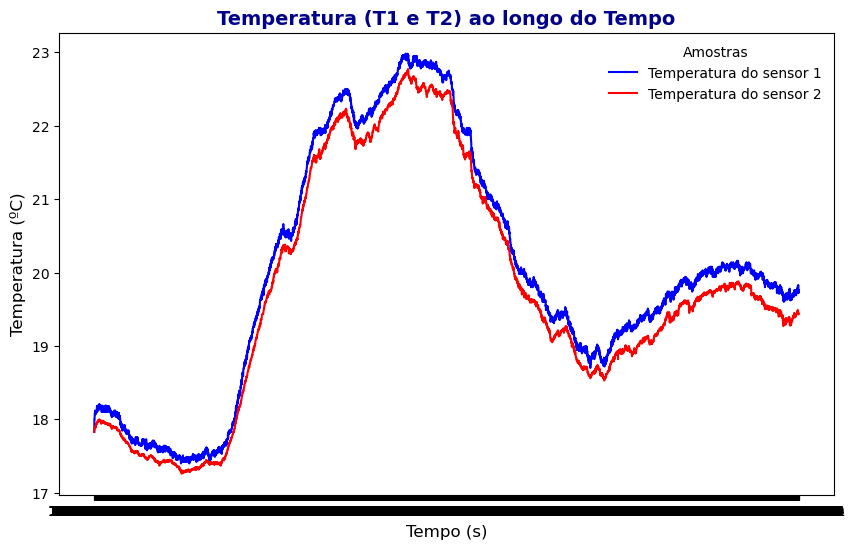

In [16]:
# Representação gráfica temperaturas/tempo
imagensT2_directory = 'Ficheiros/T2/'
TempT2_nome = 'Gráfico_TemperaturaTempo_T2.png'
TempT2_filepath = imagensT2_directory + TempT2_nome

plt.figure(figsize=(10, 6))
plt.plot(df_amostras_professor['HH:MM:SS.SSS'], df_amostras_professor['T1(C)'], color='blue', label='Temperatura do sensor 1')
plt.plot(df_amostras_professor['HH:MM:SS.SSS'], df_amostras_professor['T2(C)'], color='red', label='Temperatura do sensor 2')
plt.title('Temperatura (T1 e T2) ao longo do Tempo', fontdict=formatoTitulo)
plt.xlabel('Tempo (s)', fontdict=formatoEixos)
plt.ylabel('Temperatura (ºC)', fontdict=formatoEixos)
plt.legend(title='Amostras', frameon=False)
plt.savefig(TempT2_filepath, dpi=600)
plt.show()

---
> - **Representação gráfica pressão atmosférica/tempo**

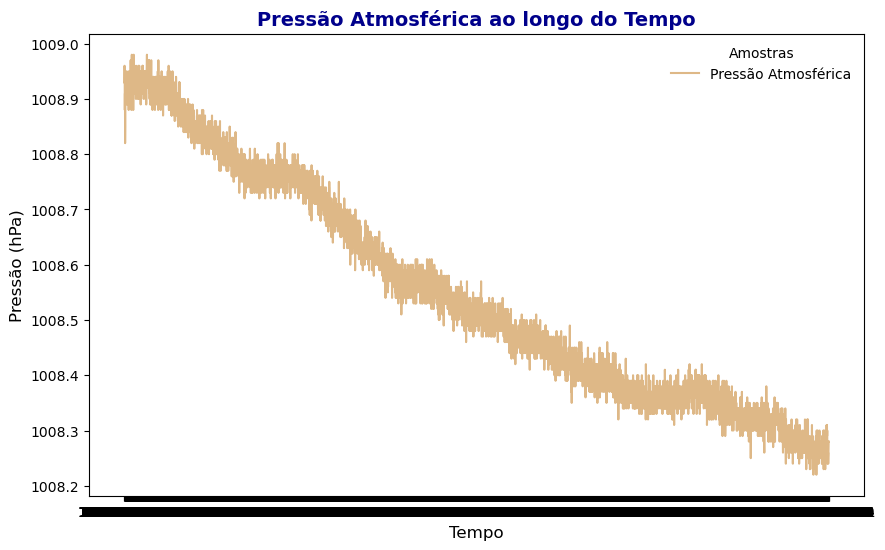

In [17]:
# Representação gráfica pressão atmosférica/tempo
PressaoAtmosfericaT2_nome = 'Gráfico_PressaoAtmosfericaTempo_T2.png'
PressaoAtmosfericaT2_filepath = imagensT2_directory + PressaoAtmosfericaT2_nome

plt.figure(figsize=(10, 6))
plt.plot(df_amostras_professor['HH:MM:SS.SSS'], df_amostras_professor['P(hPa)'], color='burlywood', label='Pressão Atmosférica')
plt.title('Pressão Atmosférica ao longo do Tempo', fontdict=formatoTitulo)
plt.xlabel('Tempo', fontdict=formatoEixos)
plt.ylabel('Pressão (hPa)', fontdict=formatoEixos)
plt.legend(title='Amostras', frameon=False)
plt.savefig(PressaoAtmosfericaT2_filepath, dpi=600)
plt.show()

---
> - **Representação gráfica Humidade Relativa/Tempo**

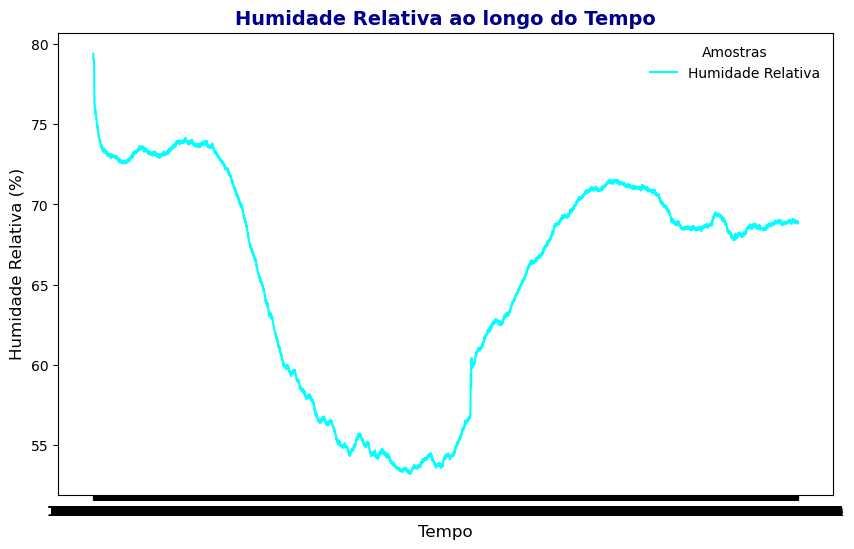

In [18]:
# Representação gráfica humidade relativa/tempo
HumidadeRelativaT2_nome = 'Gráfico_HumidadeRelativaTempo_T2.png'
HumidadeRelativaT2_filepath = imagensT2_directory + HumidadeRelativaT2_nome

plt.figure(figsize=(10, 6))
plt.plot(df_amostras_professor['HH:MM:SS.SSS'], df_amostras_professor['HR(%)'], color='cyan', label='Humidade Relativa')
plt.title('Humidade Relativa ao longo do Tempo', fontdict=formatoTitulo)
plt.xlabel('Tempo', fontdict=formatoEixos)
plt.ylabel('Humidade Relativa (%)', fontdict=formatoEixos)
plt.legend(title='Amostras', frameon=False)
plt.savefig(HumidadeRelativaT2_filepath, dpi=600)
plt.show()

---
## (5) Cálculo das grandezas de estatística descritiva 

Desta vez, foi criada uma função onde são calculadas todas as grandezas de estatística de uma vez (***grandezas_estatistica()***), para uma estrutura mais organizada, visto que, sem a mesma teria de haver código repetido inúmeras vezes.

In [20]:
def grandezas_estatistica(coluna):  # declaração da função
    media = df_amostras_professor[coluna].mean()
    maximo = df_amostras_professor[coluna].max()
    minimo = df_amostras_professor[coluna].min()
    mediana = df_amostras_professor[coluna].median()
    desvio_padrao = df_amostras_professor[coluna].std()
    return media, maximo, minimo, mediana, desvio_padrao # Resultado da mesma

# Grandezas da Temperatura (T1)
grandezas_t1 = grandezas_estatistica('T1(C)')

# Grandezas da Temperatura (T2)
grandezas_t2 = grandezas_estatistica('T2(C)')

# Grandezas da Pressão Atmosférica
grandezas_pressao = grandezas_estatistica('P(hPa)')

# Grandezas da Humidade Relativa (HR)
grandezas_humidade = grandezas_estatistica('HR(%)')


> - **Grandezas de estatística da Temperatura do sensor 1**

In [21]:
print('Grandezas de estatística da Temperatura do sensor 1: \n')

# print Grandezas da Temperatura sensor 1
print('Sensor de Temperatura 1:\n')
print(f'Média: {grandezas_t1[0]:.2f} ºC')
print(f'Temperatura Máxima: {grandezas_t1[1]:.2f} ºC')
print(f'Temperatura Mínima: {grandezas_t1[2]:.2f} ºC')
print(f'Mediana das Temperaturas: {grandezas_t1[3]:.2f}')
print(f'Desvio padrão das Temperaturas: {grandezas_t1[4]:.3f}')

Grandezas de estatística da Temperatura do sensor 1: 

Sensor de Temperatura 1:

Média: 19.99 ºC
Temperatura Máxima: 22.98 ºC
Temperatura Mínima: 17.40 ºC
Mediana das Temperaturas: 19.85
Desvio padrão das Temperaturas: 1.641


> - **Grandezas de estatística da Temperatura do sensor 2**

In [22]:
print('Grandezas de estatística da Temperatura do sensor 2: \n')

# print Grandezas da Temperatura sensor 2
print('Sensor de Temperatura 1:\n')
print(f'Média: {grandezas_t2[0]:.2f} ºC')
print(f'Temperatura Máxima: {grandezas_t2[1]:.2f} ºC')
print(f'Temperatura Mínima: {grandezas_t2[2]:.2f} ºC')
print(f'Mediana das Temperaturas: {grandezas_t2[3]:.2f}')
print(f'Desvio padrão das Temperaturas: {grandezas_t2[4]:.3f}')

Grandezas de estatística da Temperatura do sensor 2: 

Sensor de Temperatura 1:

Média: 19.74 ºC
Temperatura Máxima: 22.77 ºC
Temperatura Mínima: 17.26 ºC
Mediana das Temperaturas: 19.55
Desvio padrão das Temperaturas: 1.604


> - **Grandezas de estatística da Pressão Atmosférica**

In [23]:
print('Grandezas de estatística da Pressão Atmosférica: \n')

# print Grandezas da Pressão atmosférica
print('Sensor de Pressão Atmosférica:\n')
print(f'Média: {grandezas_pressao[0]:.2f} hPa')
print(f'Pressão Máxima: {grandezas_pressao[1]:.2f} hPa')
print(f'Pressão Mínima: {grandezas_pressao[2]:.2f} hPa')
print(f'Mediana das Pressões: {grandezas_pressao[3]:.2f}')
print(f'Desvio padrão das Pressões: {grandezas_pressao[4]:.3f}')

Grandezas de estatística da Pressão Atmosférica: 

Sensor de Pressão Atmosférica:

Média: 1008.55 hPa
Pressão Máxima: 1008.98 hPa
Pressão Mínima: 1008.22 hPa
Mediana das Pressões: 1008.51
Desvio padrão das Pressões: 0.202


> - **Grandezas de estatística da Humidade Relativa**

In [24]:
print('Grandezas de estatística da Humidade Relativa: \n')

#print Grandezas da Humidade Relativa
print('Sensor de Humidade Relativa:\n')
print(f'Média: {grandezas_humidade[0]:.2f}%')
print(f'Pressão Máxima: {grandezas_humidade[1]:.2f}%')
print(f'Pressão Mínima: {grandezas_humidade[2]:.2f}%')
print(f'Mediana das Pressões: {grandezas_humidade[3]:.2f}')
print(f'Desvio padrão das Pressões: {grandezas_humidade[4]:.3f}')

Grandezas de estatística da Humidade Relativa: 

Sensor de Humidade Relativa:

Média: 65.65%
Pressão Máxima: 79.39%
Pressão Mínima: 53.22%
Mediana das Pressões: 68.55
Desvio padrão das Pressões: 6.930


---
## (6) Criação de Gráficos de Frequência
Repetindo o mesmo processo anterior, obtém-se o seguinte:

> - **Histograma da Temperatura do sensor 1**

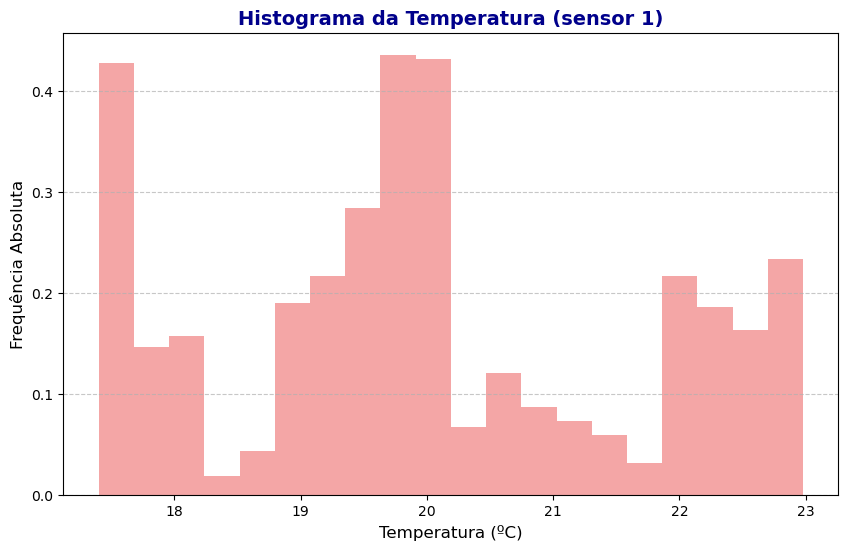

In [25]:
# Histograma das Temperaturas (sensor 1)
histogramaTemperaturaSensor1_nome = 'Histograma_TemperaturaTempo_sensor1.png'
histogramaTemperaturaSensor1_filepath = imagensT2_directory + histogramaTemperaturaSensor1_nome

plt.figure(figsize=(10, 6))
plt.title('Histograma da Temperatura (sensor 1)', fontdict=formatoTitulo)
plt.xlabel('Temperatura (ºC)', fontdict=formatoEixos)
plt.ylabel('Frequência Absoluta', fontdict=formatoEixos)
plt.hist(df_amostras_professor['T1(C)'], bins=20, density=True, facecolor='lightcoral', histtype="stepfilled", alpha=0.7)

plt.savefig(imagens_filepath, dpi = 1000)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig(histogramaTemperaturaSensor1_filepath, dpi=1000)
plt.show()

---
> - **Histograma da Temperatura do sensor 2**

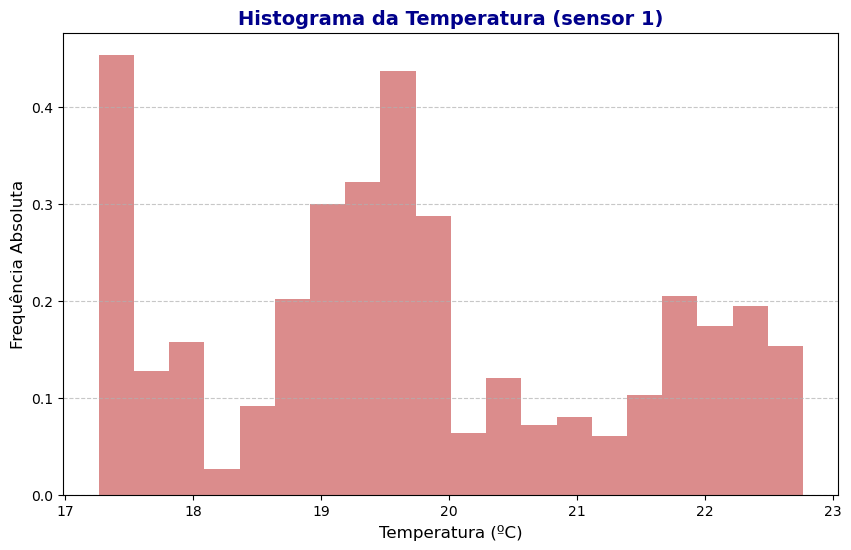

In [26]:
# Histograma das Temperaturas (sensor 2)
histogramaTemperaturaSensor2_nome = 'Histograma_TemperaturaTempo_sensor2.png'
histogramaTemperaturaSensor2_filepath = imagensT2_directory + histogramaTemperaturaSensor2_nome

plt.figure(figsize=(10, 6))
plt.title('Histograma da Temperatura (sensor 1)', fontdict=formatoTitulo)
plt.xlabel('Temperatura (ºC)', fontdict=formatoEixos)
plt.ylabel('Frequência Absoluta', fontdict=formatoEixos)
plt.hist(df_amostras_professor['T2(C)'], bins=20, density=True, facecolor='indianred', histtype="stepfilled", alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig(histogramaTemperaturaSensor2_filepath, dpi=1000)
plt.show()

---
> - **Histograma da Pressão Atmosférica**

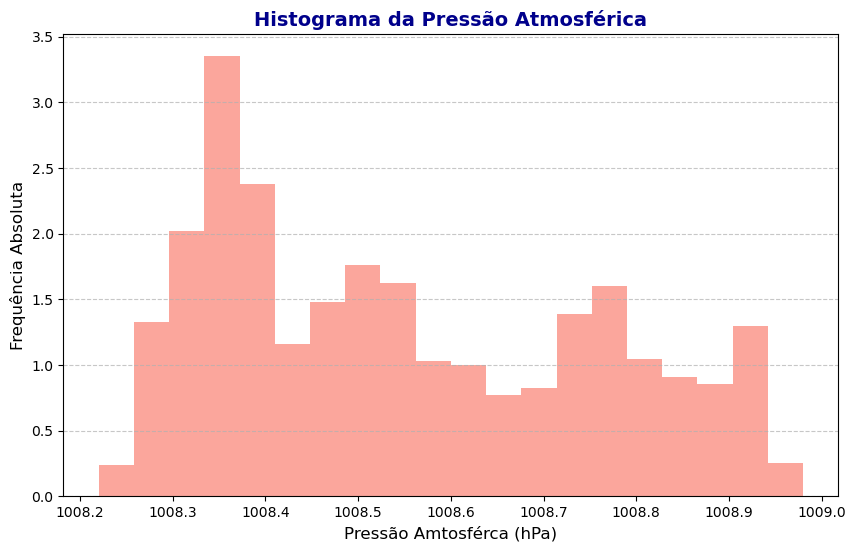

In [27]:
# Histograma das Pressões Atmosféricas
histogramaPressoes_nome = 'Histograma_Pressoes_atmosfericas.png'
histogramaPressoes_filepath = imagensT2_directory + histogramaPressoes_nome

plt.figure(figsize=(10, 6))
plt.title('Histograma da Pressão Atmosférica', fontdict=formatoTitulo)
plt.xlabel('Pressão Amtosférca (hPa)', fontdict=formatoEixos)
plt.ylabel('Frequência Absoluta', fontdict=formatoEixos)
plt.hist(df_amostras_professor['P(hPa)'], bins=20, density=True, facecolor='salmon', histtype="stepfilled", alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig(histogramaPressoes_filepath, dpi=1000)
plt.show()

---
> - **Histograma da Humidade**

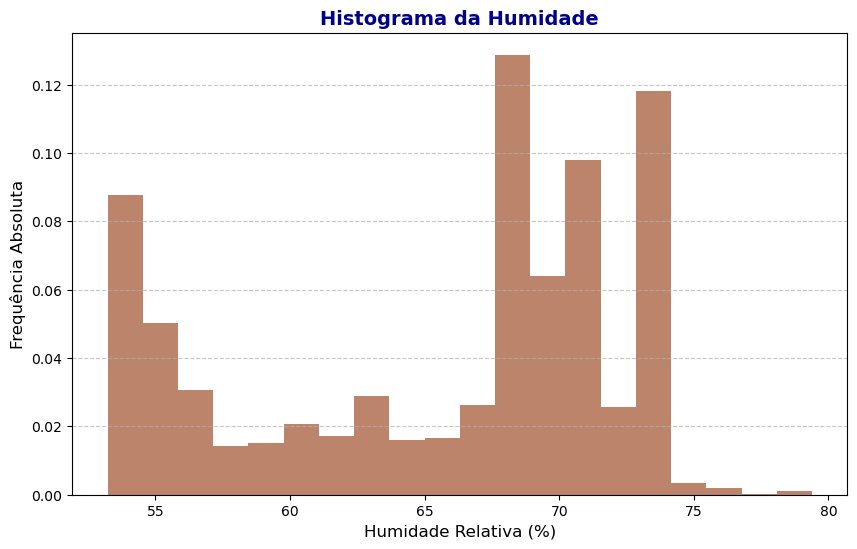

In [28]:
# Histograma das Humidades
histogramaHumidades_nome = 'Histograma_Humidades.png'
histogramaHumidades_filepath = imagensT2_directory + histogramaHumidades_nome

plt.figure(figsize=(10, 6))
plt.title('Histograma da Humidade', fontdict=formatoTitulo)
plt.xlabel('Humidade Relativa (%)', fontdict=formatoEixos)
plt.ylabel('Frequência Absoluta', fontdict=formatoEixos)
plt.hist(df_amostras_professor['HR(%)'], bins=20, density=True, facecolor='sienna', histtype="stepfilled", alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig(histogramaHumidades_filepath, dpi=1000)
plt.show()

---
## (7) Caracterização dos dados adquiridos 
Utilizando o mesmo processo, é criado novamente um txt que relata todas as informações necessárias, mas desta vez num filepath diferente.

In [29]:
filenameRelatorio2 = 'report'
filepathRelatorio2 = 'Ficheiros/T2/' + filenameRelatorio

relatorio2_conteudo = f"""--------REPORT.TXT--------

Autor do Código: {Autor}
Hardware: {Arduino_modelo}
Data de realização: {Data_Realizacao}

Cálculos Descritivos: 

[+]-[+]-[+]-|Temperatura Sensor 1|-[+]-[+]-[+]

[+] Média: {grandezas_t1[0]:.2f} ºC
[+] Temperatura Máxima: {grandezas_t1[1]:.2f} ºC
[+] Temperatura Mínima: {grandezas_t1[2]:.2f} ºC
[+] Mediana das Temperaturas: {grandezas_t1[3]:.2f}
[+] Desvio padrão das Temperaturas: {grandezas_t1[4]:.3f}

[+]-[+]-[+]-|Temperatura Sensor 2|-[+]-[+]-[+]

[+] Média: {grandezas_t2[0]:.2f} ºC
[+] Temperatura Máxima: {grandezas_t2[1]:.2f} ºC
[+] Temperatura Mínima: {grandezas_t2[2]:.2f} ºC
[+] Mediana das Temperaturas: {grandezas_t2[3]:.2f}
[+] Desvio padrão das Temperaturas: {grandezas_t2[4]:.3f}

[+]-[+]-[+]-|Pressão Atmosférica|-[+]-[+]-[+]

[+] Média: {grandezas_pressao[0]:.2f} hPa
[+] Temperatura Máxima: {grandezas_pressao[1]:.2f} hPa
[+] Temperatura Mínima: {grandezas_pressao[2]:.2f} hPa
[+] Mediana das Temperaturas: {grandezas_pressao[3]:.2f}
[+] Desvio padrão das Temperaturas: {grandezas_pressao[4]:.3f}

[+]-[+]-[+]-|Humiadade|-[+]-[+]-[+]

[+] Média: {grandezas_humidade[0]:.2f}%
[+] Temperatura Máxima: {grandezas_humidade[1]:.2f}%
[+] Temperatura Mínima: {grandezas_humidade[2]:.2f}%
[+] Mediana das Temperaturas: {grandezas_humidade[3]:.2f}
[+] Desvio padrão das Temperaturas: {grandezas_humidade[4]:.3f}

Também foram guardadas cópias das visualizações gráficas no mesmo diretório!
"""

# criação do ficheiro "report.txt"
with open(filepathRelatorio2 + '.txt', 'w') as relatorio2:
    relatorio2.write(relatorio2_conteudo)
    
print(f'O relatório com o nome de {filenameRelatorio2}.txt foi criado e guardado em: {filepathRelatorio2}')

O relatório com o nome de report.txt foi criado e guardado em: Ficheiros/T2/report


---
## 2.9 - Visualização gráfica das correlações entre grandezas obtidas
Neste segmento do estudo, serão apresentados gráficos que possibilitam a observação das correlações entre variáveis, mais especificamente entre T1 e T2, T1 e P, e T1 e HR.

> - **Correlação entre a Temperatura do sensor 1 e do sensor 2**

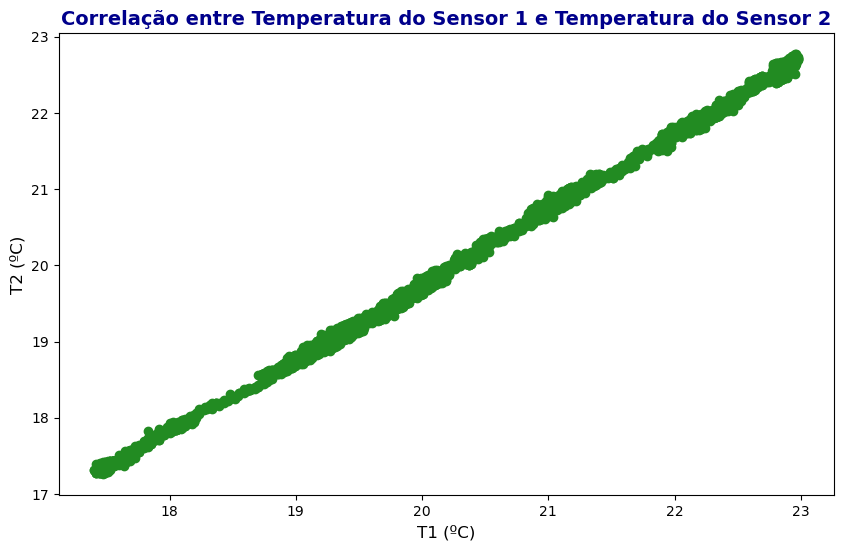

In [30]:
# Correlação entre T1 e T2
imagensT2_directory = 'Ficheiros/T2/'
CorrT1T2_nome = 'Correlação_T1_T2.png'
CorrT1T2_filepath = imagensT2_directory + TempT2_nome

plt.figure(figsize=(10, 6))
plt.scatter(df_amostras_professor['T1(C)'], df_amostras_professor['T2(C)'], color='forestgreen')
plt.title('Correlação entre Temperatura do Sensor 1 e Temperatura do Sensor 2', fontdict=formatoTitulo)
plt.xlabel('T1 (ºC)', fontdict=formatoEixos)
plt.ylabel('T2 (ºC)', fontdict=formatoEixos)
plt.savefig(CorrT1T2_filepath, dpi=1000)
plt.show()

---
> - **Correlação entre a Temperatura do sensor 1 e Pressão Atmosférica**

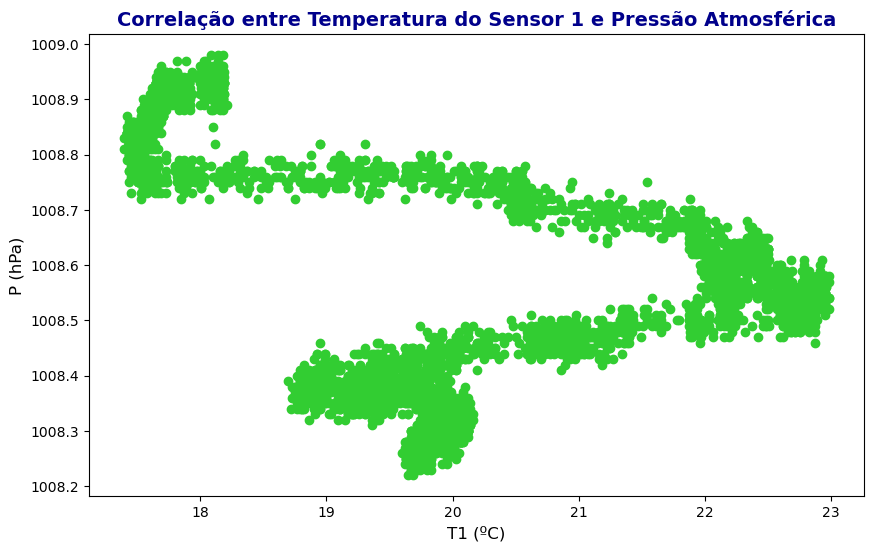

In [32]:
# Correlação entre T1 e P
imagensT2_directory = 'Ficheiros/T2/'
CorrT1_P_nome = 'Correlação_T1_P.png'
CorrT1_P_filepath = imagensT2_directory + CorrT1_P_nome

plt.figure(figsize=(10, 6))
plt.scatter(df_amostras_professor['T1(C)'], df_amostras_professor['P(hPa)'], color='limegreen')
plt.title('Correlação entre Temperatura do Sensor 1 e Pressão Atmosférica', fontdict=formatoTitulo)
plt.xlabel('T1 (ºC)', fontdict=formatoEixos)
plt.ylabel('P (hPa)', fontdict=formatoEixos)
plt.savefig(CorrT1_P_filepath, dpi=1000)
plt.show()

---
> - **Correlação entre a Temperatura do sensor 1 e a Hummidade Relativa**

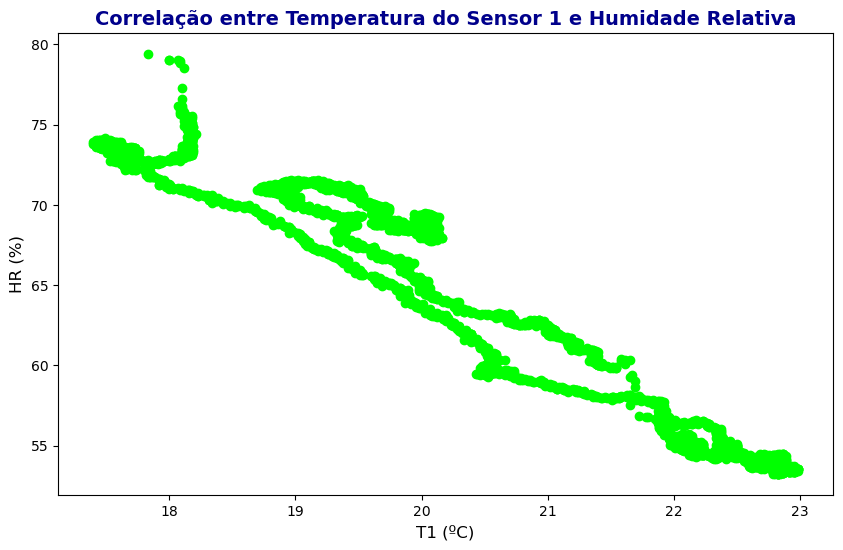

In [33]:
# Correlação entre T1 e HR
imagensT2_directory = 'Ficheiros/T2/'
CorrT1_HR_nome = 'Correlação_T1_HR.png'
CorrT1_HR_filepath = imagensT2_directory + CorrT1_HR_nome

plt.figure(figsize=(10, 6))
plt.scatter(df_amostras_professor['T1(C)'], df_amostras_professor['HR(%)'], color='lime')
plt.title('Correlação entre Temperatura do Sensor 1 e Humidade Relativa', fontdict=formatoTitulo)
plt.xlabel('T1 (ºC)', fontdict=formatoEixos)
plt.ylabel('HR (%)', fontdict=formatoEixos)
plt.savefig(CorrT1_HR_filepath, dpi=1000)
plt.show()

---
## 2.10 - Cálculo do Coeficiente de correlação de Pearson entre T1 e T2
O cálculo do coeficiente de correlação de Pearson permite comparar duas variávies quanto à sua associação.

In [34]:
# Armazenamento dos dados de T1 e T2 em listas
Amostras_Sensor1 = df_amostras_professor['T1(C)']
Amostras_Sensor2 = df_amostras_professor['T2(C)']

# Conversão das listas para arrays
Amostras_Sensor1_array = np.array(Amostras_Sensor1)
Amostras_Sensor2_array = np.array(Amostras_Sensor2)

# Cálculo do coeficiente
Coeficiente_Pearson = np.corrcoef(Amostras_Sensor1_array, Amostras_Sensor2_array)[0, 1]

print(f' O Coeficiente de correlação de Pearson entre T1 e T2 é: {Coeficiente_Pearson:.2f}')

 O Coeficiente de correlação de Pearson entre T1 e T2 é: 1.00


Como o coeficiente é maior que 0, ambas as variáveis têm uma associação positiva, isto é, são "proporcionais".

<hr style='border: 2px solid black'>

#  **Conclusão**

- O trabalho alcançou sucesso na implementação das tarefas propostas, integrando eficientemente códigos Arduino e Jupyter notebooks. <br>
- A aquisição, tratamento e visualização de dados foram realizados de forma eficaz, proporcionando uma compreensão abrangente dos dados. <br>
- O cálculo das grandezas estatísticas descritivas, como média, mediana, desvio padrão, máximo e mínimo, ofereceu uma melhor perspetiva sobre os conjuntos de dados. <br>
- A representação gráfica por meio de histogramas, correlações e curvas, contribuiu para uma interpretação visual das distribuições dos valores adquiridos. <br>
- A realização deste projeto proporcionou-me uma melhoria na compreensão da linguagem Python e os seus usos. Ofereceu-me ferramentas como o Jupyter Notebook e bibliotecas Python importantes para o tratamento de dados.